# Description about the data

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.


### Step 1

Extract the data from the original files, and combine the data into s single dataframe.

In [ ]:
import os
import pandas as pd
#filelist = os.listdir('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment3/assignment3_data/fruit')
#filelist
filenames = [x for x in os.listdir('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment3/assignment3_data/fruit') if x.endswith("xlsx")]
filenames

In [70]:
   def extract_fresh(fname,kind):
    """Extract the fresh information from bunches of files
    
    Arguments:
        fname:the name of file, as well the name of food
        kind: the upper file of the filename, aka the type of food
        
    Returns:
        object, including the information of fresh row of the food
    """
    ft = pd.read_excel('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment3/assignment3_data/'+kind+'/'+fname,header=1)
    ftfresh = ft[ft['Form'].str.contains('Fresh')==True]
    purename = os.path.splitext(fname)
    ftfresh['food']= purename[0]
    return ftfresh

#data: fruit fresh rows
data = [extract_fresh(x,'fruit') for x in filenames]
datatable = pd.concat(data) #stack the rows together

#deal with irrelative information
datatable = datatable.drop(['Unnamed: 2','Unnamed: 5','Unnamed: 7','Unnamed: 8'],axis=1)
datatable.columns = ["price_per_cup",'price_per_lb','form',"yield","lb_per_cup","food" ]
n,_=datatable.shape
datatable.index = range(n)
datatable

/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price_per_cup,price_per_lb,form,yield,lb_per_cup,food
0,0.422373,1.56752,Fresh1,0.9,0.242508,apples
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas
3,1.92292,5.77471,Fresh1,0.96,0.31967,blackberries
4,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries
5,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe
6,1.33455,3.59299,Fresh1,0.92,0.341717,cherries
7,0.848278,0.897802,Fresh1,0.49,0.462971,grapefruit
8,0.721266,2.09383,Fresh1,0.96,0.330693,grapes
9,0.649077,0.796656,Fresh1,0.46,0.374786,honeydew


In [69]:
#file names of vegetables
filenames_v = [x for x in os.listdir('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment3/assignment3_data/vegetables') if x.endswith("xlsx")]

#fresh data information of kinds of vegetables
data_v = [extract_fresh(x,'vegetables') for x in filenames_v]
data_v
datatable_v = pd.concat(data_v) #stack the rows together

#deal with irrelative info.
datatable_v = datatable_v.drop(['Unnamed: 2','Unnamed: 5','Unnamed: 7','Unnamed: 8'],axis=1)
datatable_v.columns = ["price_per_cup",'price_per_lb','form',"yield","lb_per_cup",'food' ]
n,_=datatable_v.shape
datatable_v.index = range(n)
datatable_v

/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price_per_cup,price_per_lb,form,yield,lb_per_cup,food
0,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke
2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus
3,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados
4,NaN,,Fresh,,,broccoli
5,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts
6,0.787893,1.24474,Fresh1,0.714,0.451948,butternut_squash
7,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,cabbage
8,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,cabbage
9,NaN,NaN,Fresh,NaN,NaN,carrots


My code can't produce the correct price for some vegetables like tomatoes. The reason is that the "fresh" row in these excels is an index row, and all the subspecies of them have their own price, which we can't extract them. There are 8 vegetables which have the same problem as tomatoes totally: lettuce_romaine, spinach, mushrooms, carrots, cauliflower,celery broccoli, tomatoes.

In [68]:
datatable_v = datatable_v[datatable_v['price_per_cup'].notnull()]
datatable_v['type']='vegetables'
datatable['type']='fruit'
totaldata = pd.concat([datatable,datatable_v],ignore_index=True)
cols = ['type','food','form','price_per_cup','price_per_lb','yield','lb_per_cup']
totaldata = totaldata.ix[:,cols]
print totaldata['price_per_lb'][1] #which checks that it's numeric
totaldata.to_csv('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment3/dataset.csv')
totaldata

3.0400719671


,type,food,form,price_per_cup,price_per_lb,yield,lb_per_cup
0,fruit,apples,Fresh1,0.422373,1.56752,0.9,0.242508
1,fruit,apricots,Fresh1,1.1891,3.04007,0.93,0.363763
2,fruit,bananas,Fresh1,0.292965,0.566983,0.64,0.330693
3,fruit,blackberries,Fresh1,1.92292,5.77471,0.96,0.31967
4,fruit,blueberries,Fresh1,1.59318,4.73462,0.95,0.31967
5,fruit,cantaloupe,Fresh1,0.3938,0.535874,0.51,0.374786
6,fruit,cherries,Fresh1,1.33455,3.59299,0.92,0.341717
7,fruit,grapefruit,Fresh1,0.848278,0.897802,0.49,0.462971
8,fruit,grapes,Fresh1,0.721266,2.09383,0.96,0.330693
9,fruit,honeydew,Fresh1,0.649077,0.796656,0.46,0.374786


### Here is some questions I am interested in:

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [27]:
pricemax = totaldata[totaldata["type"]=='fruit'].price_per_lb.max()
print totaldata[totaldata['price_per_lb']==pricemax]['food']
pricemin = totaldata[totaldata["type"]=='fruit'].price_per_lb.min()
print totaldata[totaldata['price_per_lb']==pricemin]['food']

20    raspberries
Name: food, dtype: object
23    watermelon
Name: food, dtype: object


* Raspberry is the most expensive (per pound), and Watermelon is the cheapest one.

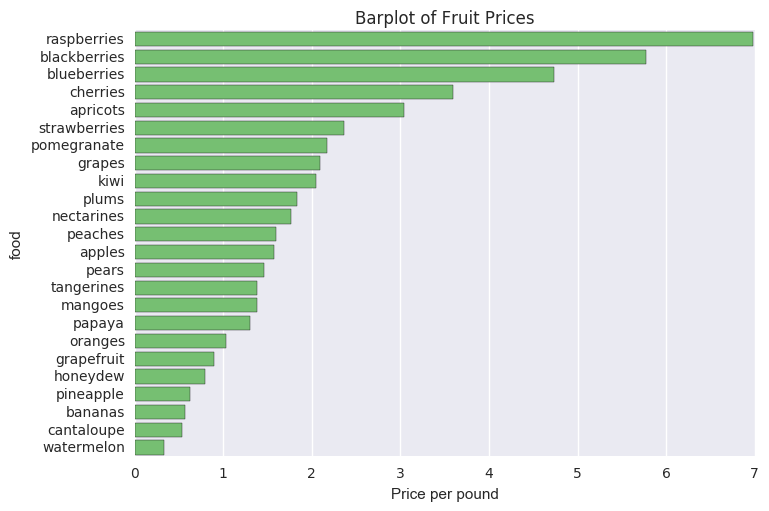

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

pricedata = datatable.sort_values("price_per_lb", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="price_per_lb", y="food", data=pricedata,
            label="price",color='g')
plt.title('Barplot of Fruit Prices')
plt.xlabel('Price per pound')
plt.show()

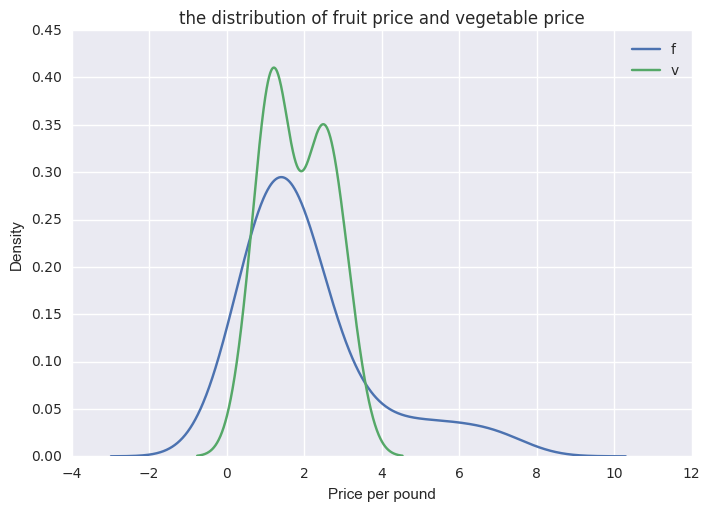

In [44]:
import matplotlib.pyplot as plt
density1 = datatable['price_per_lb'].plot.kde()
datatable_v['price_per_lb'].plot.kde()
plt.xlabel('Price per pound')
plt.legend('fv')
plt.title("the distribution of fruit price and vegetable price")
plt.show()

* The sample distribution of price of fruit looks like bell-shaped, but it's severely heavy-tailed. And the sample distribution of vegetable is more sharp and binomal, which means that the range of vegetables is smaller than fruit. But the prices of most fruits and vegetables center on [0,4], which is commonly understandable. 

In [41]:
changedprice = totaldata['price_per_lb']/totaldata['yield']
print changedprice[changedprice ==changedprice.min()].index
totaldata['food'][23]

Int64Index([23], dtype='int64')


'watermelon'

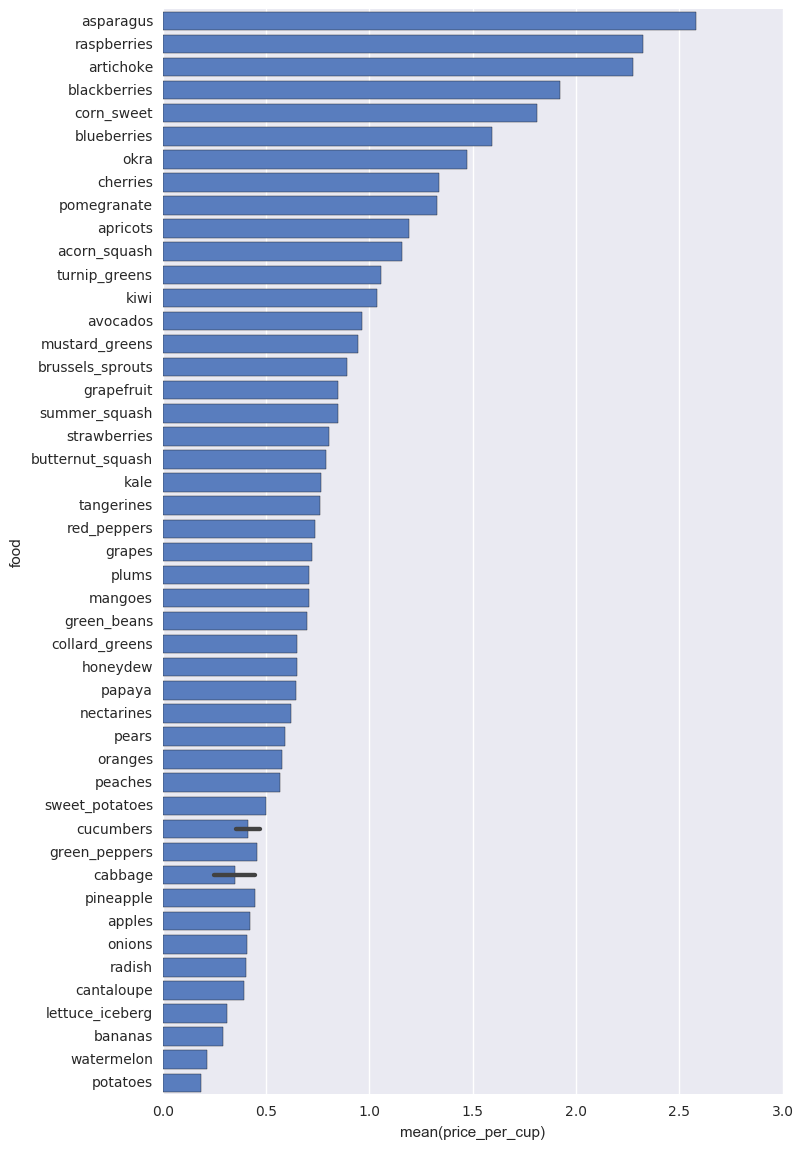

In [72]:
plt.subplots(figsize=(8, 14))
pricedata2 = total2.sort_values("price_per_cup", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="price_per_cup", y="food", data=pricedata2,
            label="price",color='b')
plt.show()

* potatoes have the best value for the price since they have the largest price per cup. It also can be gotten by the changedprice, which is price_per_lb divided by yield.

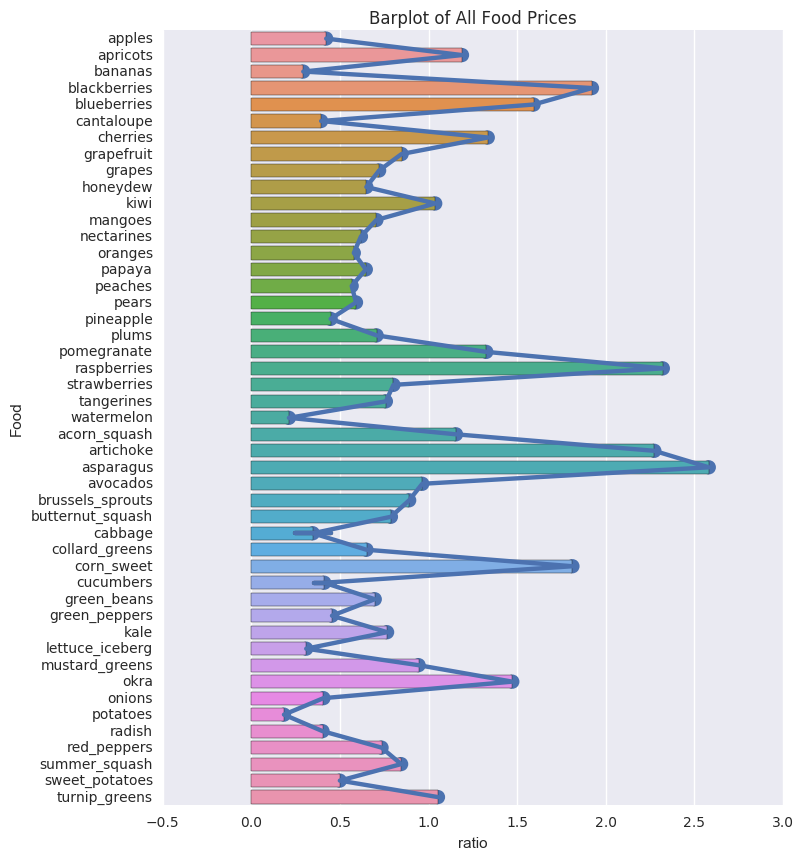

In [67]:
plt.subplots(figsize=(8, 10))
sns.barplot((totaldata['price_per_lb']*totaldata['lb_per_cup']/totaldata['yield']),totaldata['food'])
sns.pointplot((totaldata['price_per_cup']),totaldata['food'])
plt.title('Barplot of All Food Prices',)
plt.xlabel('ratio')
plt.ylabel('Food')
plt.show()

* We could figure out a relationship between these variables:   $pricepercup\div priceperlb\cdot yield =lbpercup	$.

From the graph above, the fold line shows the price per cup and the barplot show the value of $priceperlb\times lbpercup \div yield$. Since the units imply there may be some relationship between these two price and yield, we just try to figure out the relative relationship between price_per_cup and price_per_lb. So we get the equation above, and the graph verifies it.

There are two kinds of food which have two fresh price: cucumber and cabbage, since they both have two kinds of subspecies and their prices are different.

* We can resort the food by the price and yield, and then we could see that some vegetables have both cheap price and more yield, like cucumbers, cabbage and lettuce_iceberg. We need to look furthur about their nutrition so that we may say which one has the best combination of price, yield, and nutrition.